In [34]:
#importing
import os
import sys
import random
import warnings
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from tqdm import tqdm
from itertools import chain
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from keras.models import Model, load_model
from keras.layers import Input
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
import tensorflow as tf
import cv2

In [35]:
#Resizing the training, mask and testing images
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

TRAIN_PATH = 'data/train/'
mask_path='data/binary/'
train_id=[]
test_id=[]
mask_id=[]
TEST_PATH = 'data/test/'
for i in range(199):
    train_ids=os.walk(TRAIN_PATH)
    train_id.append(train_ids)
    

lentrain=i+1

for k in range(199):
    mask_ids=os.walk(mask_path)
    mask_id.append(mask_ids)

lenmask=k+1
for j in range(51):
    test_ids=os.walk(TEST_PATH)
    test_id.append(test_ids)
lentest=j+1

X_train = np.zeros((lentrain, IMG_HEIGHT, IMG_WIDTH,IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((lenmask, IMG_HEIGHT, IMG_WIDTH), dtype=bool)


for n, id_ in tqdm(enumerate(train_id), total=lentrain):
    path = TRAIN_PATH 
    img = imread(path + str(n) + '.bmp')[:,:,:IMG_CHANNELS]
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_train[n] = img
    
mask = np.zeros((IMG_HEIGHT, IMG_WIDTH), dtype=bool)
for n, id_ in tqdm(enumerate(mask_id), total=lenmask):
    path = mask_path 
    img = cv2.imread(path + str(n) + '.png',0)
    print(img.shape)
    mask = resize(img, (IMG_HEIGHT, IMG_WIDTH),mode='constant', preserve_range=True)
    print(mask.shape)
    
    Y_train[n] = mask 
 
        
    
X_test = np.zeros((lentest+1, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
sizes_test = []
print('Getting and resizing test images ... ')
    
for n, id_ in tqdm(enumerate(test_id), total=lentest):
    path1 = TEST_PATH 
    img1 = imread(path1 + str(n) + '.bmp')[:,:,:IMG_CHANNELS]
    img2 = resize(img1, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_test[n] = img2

  4%|███▎                                                                              | 8/199 [00:00<00:02, 73.07it/s]

(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)


 12%|█████████▊                                                                       | 24/199 [00:00<00:02, 74.61it/s]

(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)


 21%|████████████████▋                                                                | 41/199 [00:00<00:02, 76.81it/s]

(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)


 28%|██████████████████████▍                                                          | 55/199 [00:00<00:02, 70.04it/s]

(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)


 31%|█████████████████████████▏                                                       | 62/199 [00:00<00:02, 67.18it/s]

(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)

 38%|██████████████████████████████▉                                                  | 76/199 [00:01<00:01, 66.14it/s]


(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)

 46%|█████████████████████████████████████▍                                           | 92/199 [00:01<00:01, 70.81it/s]


(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)

 54%|███████████████████████████████████████████▍                                    | 108/199 [00:01<00:01, 73.09it/s]


(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)


 58%|██████████████████████████████████████████████▋                                 | 116/199 [00:01<00:01, 74.06it/s]

(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)

 67%|█████████████████████████████████████████████████████▍                          | 133/199 [00:01<00:00, 76.79it/s]


(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)


 75%|████████████████████████████████████████████████████████████▎                   | 150/199 [00:02<00:00, 77.62it/s]

(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)

 83%|██████████████████████████████████████████████████████████████████▋             | 166/199 [00:02<00:00, 72.46it/s]


(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)


 87%|█████████████████████████████████████████████████████████████████████▉          | 174/199 [00:02<00:00, 69.12it/s]

(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)

 95%|████████████████████████████████████████████████████████████████████████████▍   | 190/199 [00:02<00:00, 71.30it/s]


(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)

  0%|                                                                                           | 0/51 [00:00<?, ?it/s]


(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
(568, 712)
(128, 128)
Getting and resizing test images ... 


100%|██████████████████████████████████████████████████████████████████████████████████| 51/51 [00:01<00:00, 26.66it/s]


119


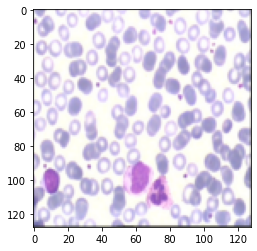

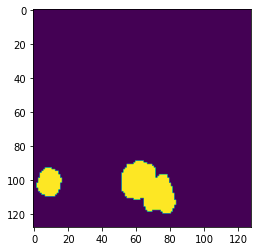

51


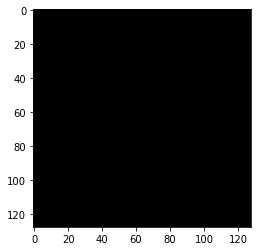

In [36]:
#Displaying a random image from the array X_train(training set), Y_train(mask) and X_test(test set)
image_x = random.randint(0, lentrain)
print(image_x)
res=X_train[image_x]
plt.imshow(res)
plt.show()
res1=Y_train[image_x]
plt.imshow(np.squeeze(res1))
plt.show()
image_x2= random.randint(0, lentest)
print(image_x2)
res2=X_test[image_x2]
plt.imshow(res2)
plt.show()

In [ ]:
#UNET model
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

#Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Expansive path 
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
 
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
 
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
checkpointer = tf.keras.callbacks.ModelCheckpoint('model', verbose=1, save_best_only=True)

earlystopper = EarlyStopping(patience=5, verbose=1)
checkpointer = ModelCheckpoint('model-dsbowl2018-1.h5', verbose=1, save_best_only=True)

def mean_iou(y_pred, y_true):
    I = tf.reduce_sum(y_pred * y_true, axis=(1, 2))
    U = tf.reduce_sum(y_pred + y_true, axis=(1, 2)) - I
    mean_iou=tf.reduce_mean(I / U)
    return mean_iou
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[mean_iou])

results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=16,epochs=5, callbacks=[earlystopper, checkpointer])


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 128, 128, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_19 (Conv2D)              (None, 128, 128, 16) 448         lambda_1[0][0]                   
__________________________________________________________________________________________________
dropout_9 (Dropout)             (None, 128, 128, 16) 0           conv2d_19[0][0]                  
____________________________________________________________________________________________

 80/179 [============>.................] - ETA: 11s - loss: 0.3966 - mean_iou: 0.0147

179/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

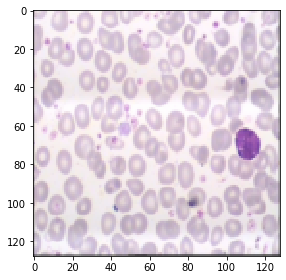

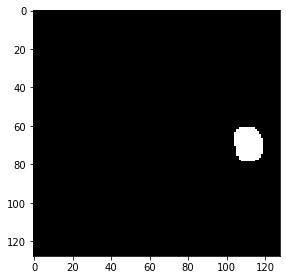

C:\Users\HP\Anaconda3\envs\pytorch_env\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


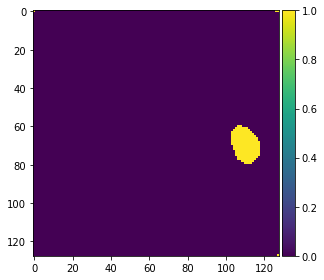

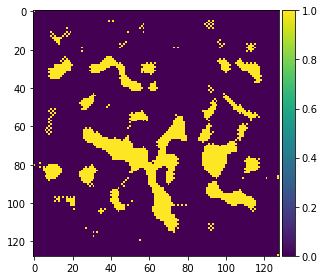

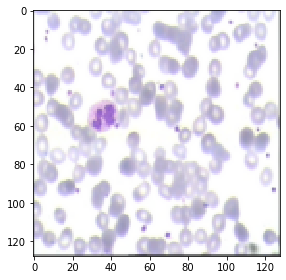

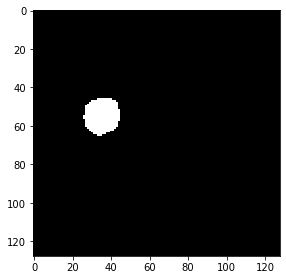

In [9]:
import random

import seaborn as sns
idx = random.randint(0, len(X_train))


preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
preds_val1 = model.predict(X_train[int(Y_train.shape[0]*0.9):], verbose=1)
preds_test = model.predict(X_test, verbose=1)

 
preds_train_t = (preds_train>0.05).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.05).astype(np.uint8)


# Perform a sanity check on some random training samples
ix = 10
imshow(X_train[ix])
plt.show()
imshow(np.squeeze(Y_train[ix]))
plt.show()


imshow(np.squeeze(preds_train_t[ix]))
plt.show()
imshow(np.squeeze(preds_test_t[ix]))
plt.show()
# Perform a sanity check on some random validation samples
ix = 2
imshow(X_train[int(X_train.shape[0]*0.9):][ix])
plt.show()
imshow(np.squeeze(Y_train[int(Y_train.shape[0]*0.9):][ix]))
plt.show()




20


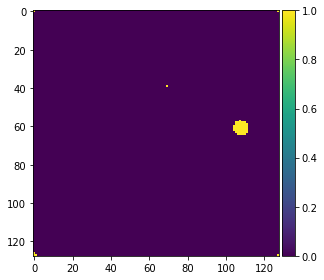

21


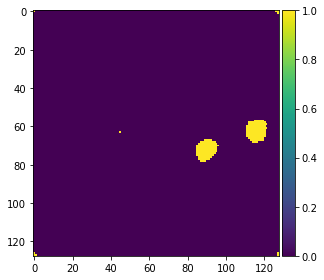

22


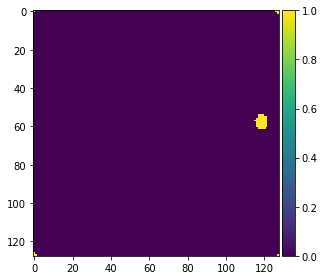

23


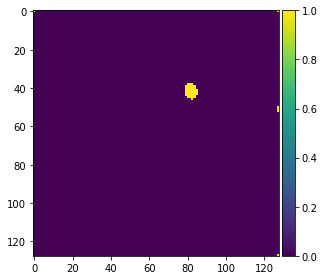

In [16]:
import imageio
preds_test_t = (preds_test > 0.03).astype(np.uint8)
path='data/segment/'
for i in range(51):
    print(i)
    res=np.squeeze(preds_test_t[i])
    imshow(res)
    plt.show()
    segment=res.reshape((128,128))
    plt.imsave(path+str(i)+'(1).png',segment)